In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
paultimothymooney_chest_xray_pneumonia_path = kagglehub.dataset_download('paultimothymooney/chest-xray-pneumonia')

print('Data source import complete.')


Data source import complete.


# Medical Image Binary Classification with Convolutional Neural Networks

This Python code is designed to create and train a Convolutional Neural Network (CNN) for binary classification of medical images. The dataset contains chest X-ray images categorized into two classes: NORMAL and PNEUMONIA.


1. **Import Libraries**:

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
import numpy as np

2. **Set Dataset Paths, Image Dimensions and Batch Size**:

In [3]:
# Set the paths to your dataset
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'

# Image dimensions and batch size
image_size = (224, 224)
batch_size = 32

Found 5216 files belonging to 2 classes.
Classes: ['NORMAL', 'PNEUMONIA']


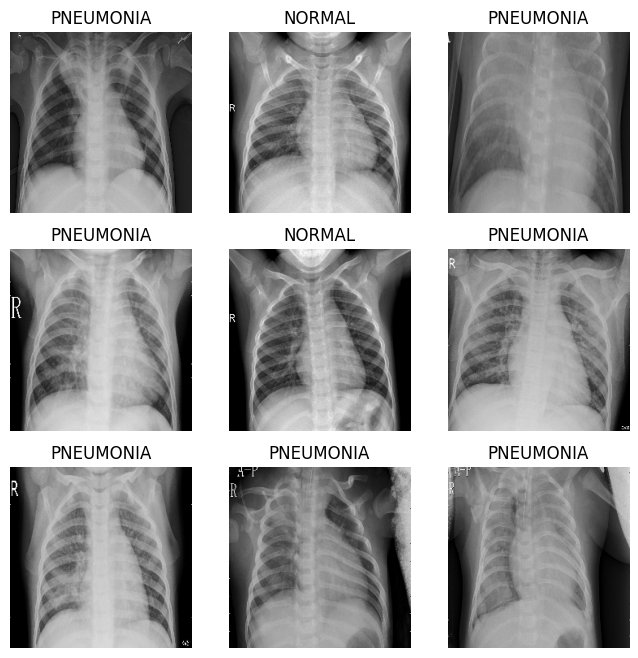

In [5]:
import matplotlib.pyplot as plt

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

class_names = train_ds.class_names
print("Classes:", class_names)

# Show a 3x3 grid from the first batch
for images, labels in train_ds.take(1):
    plt.figure(figsize=(8,8))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
    plt.show()


3. **Data Augmentation**:

In [4]:
# Data augmentation for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

4. **Data Preprocessing**:

In [5]:
# Preprocess and augment the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [6]:
# Preprocess the test and validation data
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [7]:
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


5. **Create a CNN Model**:

In [8]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(base_model.input, x)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


6. **Compile & Train the Model**:

In [9]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 150s 835ms/step - accuracy: 0.8042 - loss: 0.9483 - val_accuracy: 0.8125 - val_loss: 0.2678
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 645ms/step - accuracy: 0.9075 - loss: 0.2212 - val_accuracy: 0.7500 - val_loss: 0.5469
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 647ms/step - accuracy: 0.9263 - loss: 0.1926 - val_accuracy: 0.7500 - val_loss: 0.4784
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 650ms/step - accuracy: 0.9313 - loss: 0.1809 - val_accuracy: 0.8125 - val_loss: 0.2656
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 649ms/step - accuracy: 0.9279 - loss: 0.1662 - val_accuracy: 0.8125 - val_loss: 0.4009
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 647ms/step - accuracy: 0.9359 - loss: 0.1733 - val_accuracy: 0.8125 - val_loss: 0.3420
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 651ms/step - accuracy: 0.9361 - loss: 0.1642 - val_accuracy: 0.8125 - val_loss: 0.3143
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 645ms/step - accuracy: 0.9374 -

7. **Evaluate & save the Model**:

In [10]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 354ms/step - accuracy: 0.8884 - loss: 0.2828
Test accuracy: 89.74%


In [12]:
# Save the model
model.save('/content/sample_data/cnn_model.h5')

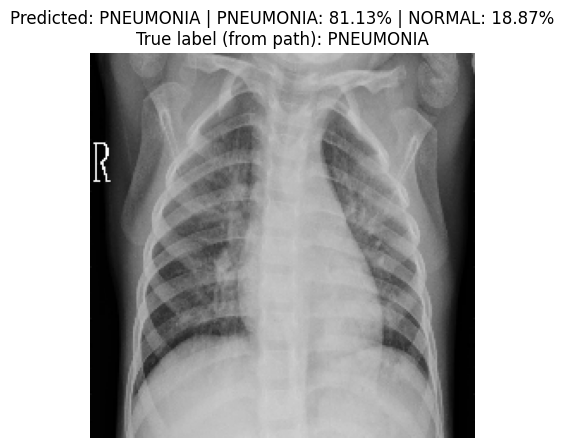

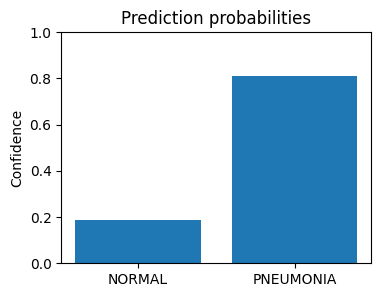

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image  # ok on Kaggle

# --- paths & settings ---
model = tf.keras.models.load_model('/content/sample_data/cnn_model.h5')
image_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg'
image_size = (224, 224)  # must match training
class_names = ['NORMAL', 'PNEUMONIA']

# --- load image ---
pil_img = image.load_img(image_path, target_size=image_size)  # RGB by default
img_arr = image.img_to_array(pil_img)                         # [H,W,3], 0..255
img_disp = img_arr.astype("uint8")                            # for plotting

# --- preprocess (match your training!) ---
x = np.expand_dims(img_arr, axis=0).astype("float32")
x = x / 255.0  # ⚠️ remove this line if your model already includes a Rescaling layer or uses a specific preprocess_input

# --- predict ---
pred = model.predict(x, verbose=0)[0]
# Handle binary (sigmoid) vs softmax(2)
if model.output_shape[-1] == 1:        # e.g., (None, 1)
    prob_pneumonia = float(pred.squeeze())
    prob_normal = 1.0 - prob_pneumonia
else:                                   # e.g., (None, 2)
    prob_normal = float(pred[0])
    prob_pneumonia = float(pred[1])

pred_label = class_names[int(prob_pneumonia >= 0.5)]
true_label = os.path.basename(os.path.dirname(image_path))

# --- show image with prediction ---
plt.figure(figsize=(5,5))
plt.imshow(img_disp.astype("uint8"))
plt.axis('off')
plt.title(
    f"Predicted: {pred_label} | PNEUMONIA: {prob_pneumonia:.2%} | NORMAL: {prob_normal:.2%}\n"
    f"True label (from path): {true_label}"
)
plt.show()

# (optional) probability bar chart
plt.figure(figsize=(4,3))
plt.bar(class_names, [prob_normal, prob_pneumonia])
plt.ylim(0, 1)
plt.title("Prediction probabilities")
plt.ylabel("Confidence")
plt.show()


8. **Test prediction**: